In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [9]:
import pandas as pd

# Define the column names based on the dataset description
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]

# Load the dataset into a DataFrame
data = pd.read_csv('adult.data', names=column_names, sep=',\s*', engine='python')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [13]:
# Handling missing values (assuming missing values are represented as '?')
data.replace('?', np.nan, inplace=True)
data.dropna(inplace=True)

In [14]:
# EDA
# Summary statistics
summary_stats = data.describe()

summary_stats

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


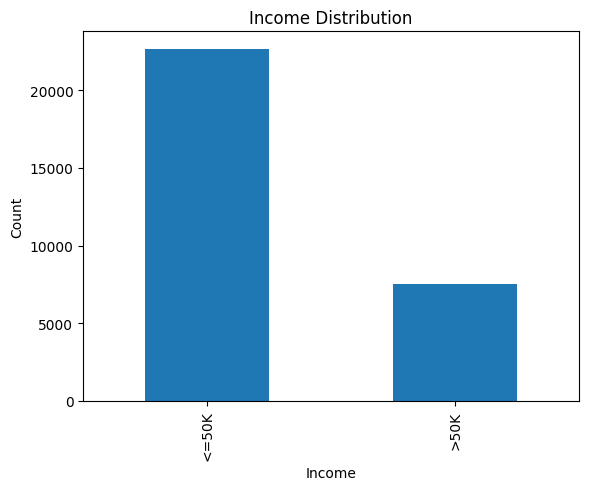

In [15]:
import matplotlib.pyplot as plt

# Plot income distribution
data['income'].value_counts().plot(kind='bar')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()


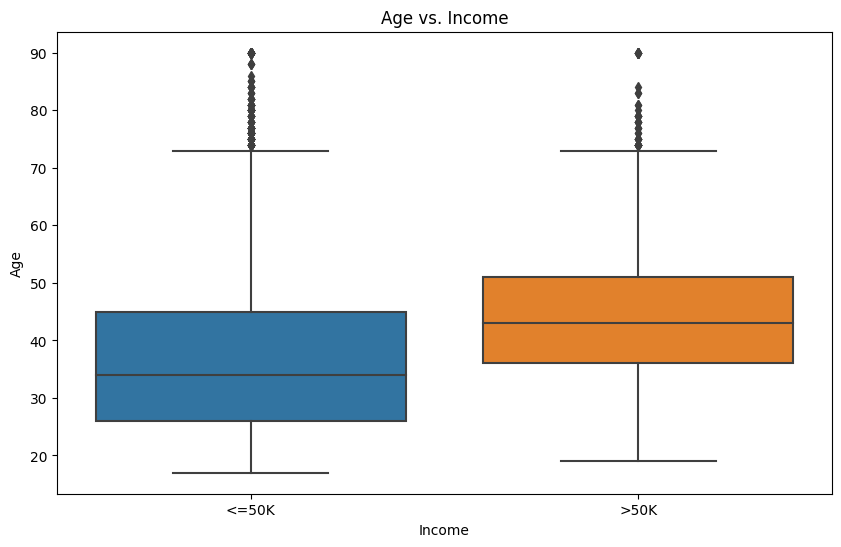

In [16]:
import seaborn as sns

# Plot age vs. income
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='age', data=data)
plt.title('Age vs. Income')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()


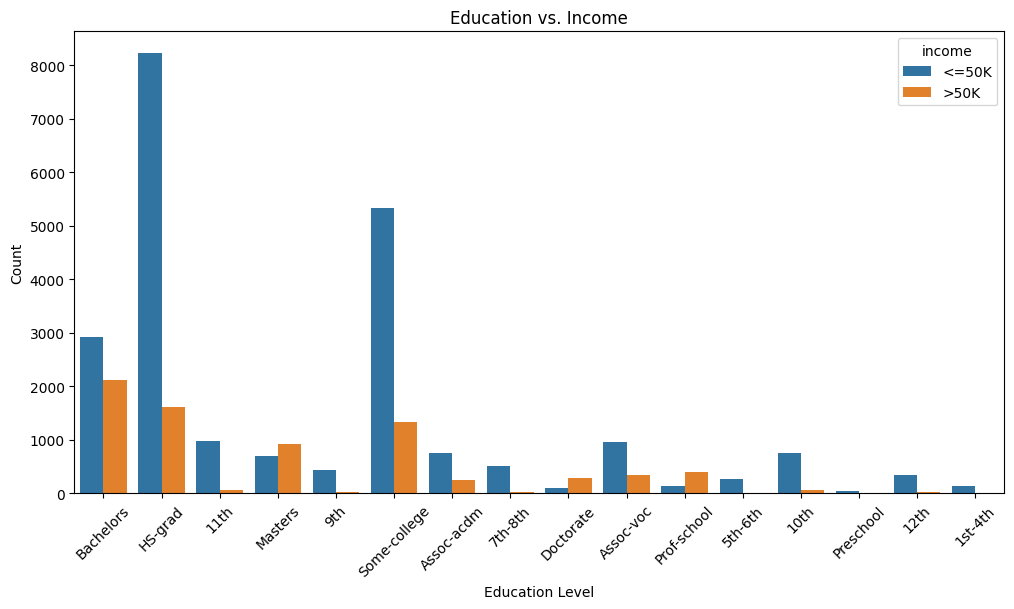

In [17]:
# Plot education vs. income
plt.figure(figsize=(12, 6))
sns.countplot(x='education', hue='income', data=data)
plt.xticks(rotation=45)
plt.title('Education vs. Income')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()


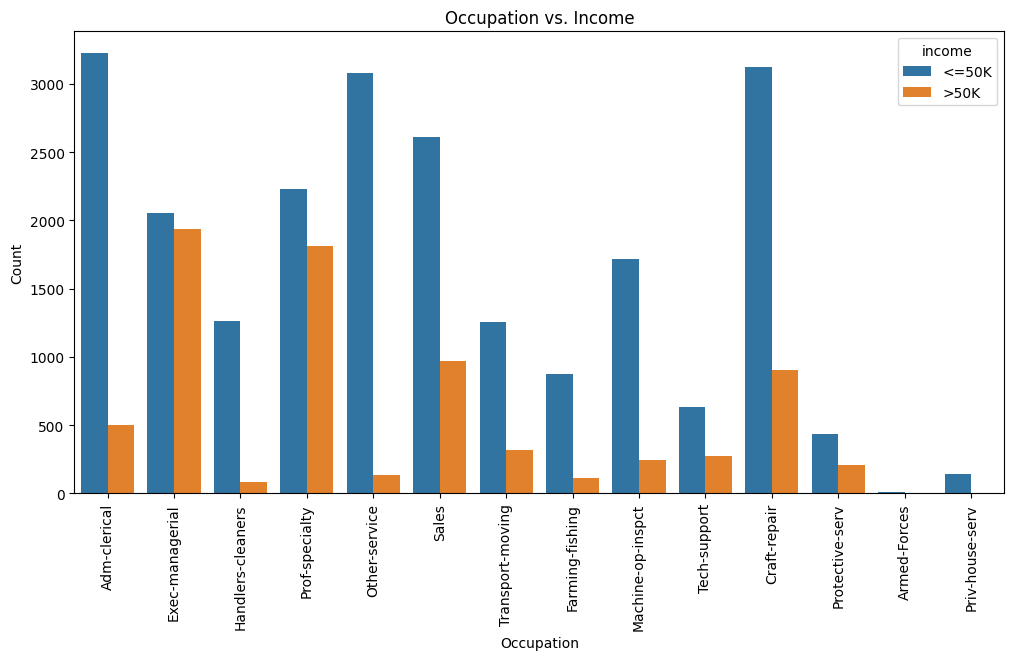

In [18]:
# Plot occupation vs. income
plt.figure(figsize=(12, 6))
sns.countplot(x='occupation', hue='income', data=data)
plt.xticks(rotation=90)
plt.title('Occupation vs. Income')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()


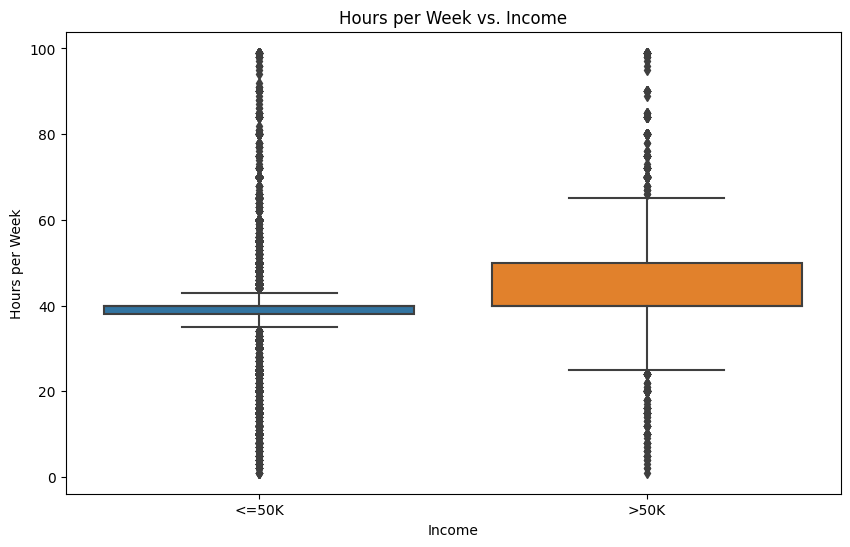

In [19]:
# Plot hours per week vs. income
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='hours-per-week', data=data)
plt.title('Hours per Week vs. Income')
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.show()


In [20]:
# Encoding categorical features
label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


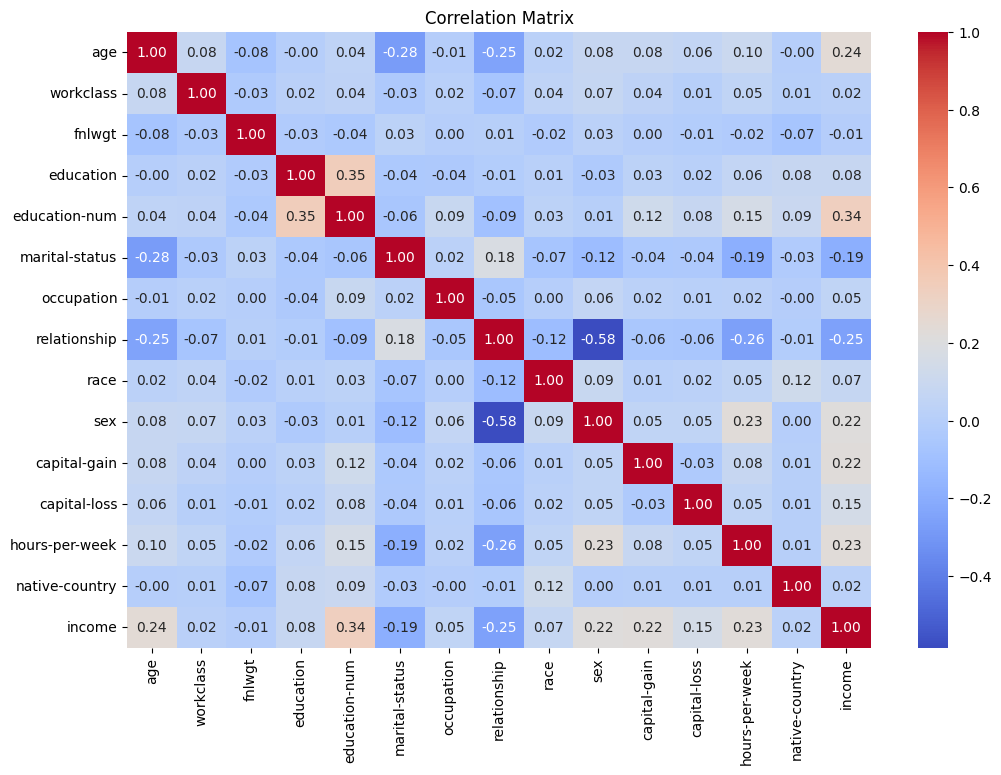

In [21]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [22]:
# Feature selection (you can choose different methods)
X = data.drop('income', axis=1)
y = data['income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:

# Model training: Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Model training: Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Model training: Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [24]:

# Hyperparameter tuning (GridSearchCV) for Logistic Regression
param_grid = {'C': [0.1, 1, 10, 100], 'max_iter': [100, 500, 1000]}
lr_grid = GridSearchCV(lr_model, param_grid, cv=3)
lr_grid.fit(X_train, y_train)
best_lr_model = lr_grid.best_estimator_

# Hyperparameter tuning (GridSearchCV) for Random Forest
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, 30]}
rf_grid = GridSearchCV(rf_model, param_grid, cv=3)
rf_grid.fit(X_train, y_train)
best_rf_model = rf_grid.best_estimator_




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [25]:
# Model evaluation and confusion matrices
lr_pred = best_lr_model.predict(X_test)
rf_pred = best_rf_model.predict(X_test)


# Classification reports and confusion matrices
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_pred))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, lr_pred))

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.87      4503
           1       0.75      0.28      0.40      1530

    accuracy                           0.79      6033
   macro avg       0.77      0.62      0.64      6033
weighted avg       0.79      0.79      0.76      6033

Logistic Regression Confusion Matrix:
[[4363  140]
 [1109  421]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4503
           1       0.78      0.64      0.70      1530

    accuracy                           0.86      6033
   macro avg       0.83      0.79      0.81      6033
weighted avg       0.86      0.86      0.86      6033

Random Forest Confusion Matrix:
[[4220  283]
 [ 546  984]]


In [26]:
from sklearn.preprocessing import StandardScaler
# Standardize features (normalize)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a feedforward neural network model
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),  # Input layer for the number of features
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

Epoch 1/10
604/604 [==============================] - 3s 3ms/step - loss: 0.3924 - accuracy: 0.8133 - val_loss: 0.3469 - val_accuracy: 0.8334
Epoch 2/10
604/604 [==============================] - 2s 3ms/step - loss: 0.3373 - accuracy: 0.8403 - val_loss: 0.3421 - val_accuracy: 0.8367
Epoch 3/10
604/604 [==============================] - 2s 3ms/step - loss: 0.3319 - accuracy: 0.8427 - val_loss: 0.3419 - val_accuracy: 0.8369
Epoch 4/10
604/604 [==============================] - 2s 3ms/step - loss: 0.3279 - accuracy: 0.8455 - val_loss: 0.3424 - val_accuracy: 0.8355
Epoch 5/10
604/604 [==============================] - 2s 3ms/step - loss: 0.3253 - accuracy: 0.8472 - val_loss: 0.3363 - val_accuracy: 0.8396
Epoch 6/10
604/604 [==============================] - 1s 2ms/step - loss: 0.3231 - accuracy: 0.8473 - val_loss: 0.3354 - val_accuracy: 0.8429
Epoch 7/10
604/604 [==============================] - 1s 2ms/step - loss: 0.3212 - accuracy: 0.8493 - val_loss: 0.3350 - val_accuracy: 0.8431
Epoch 